<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [80]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [81]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [82]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [83]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [84]:
data.shape

(153, 6)

In [85]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [86]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.00,34.0,59.00,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0
Month,153.0,6.993464,1.416522,5.0,6.00,7.0,8.00,9.0
Day,153.0,15.803922,8.864520,1.0,8.00,16.0,23.00,31.0


In [87]:
# 상관관계 확인
data.corr()
# 변수 중에 문자열 데이터가 있으면 이전 버전에선 숫자 데이터만 상관관계 표현해줬는데, 상위버전은 오류남
# 오류나지 않게 하려면
data.corr(numeric_only=True) # 이런 식으로 써줘야 함

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


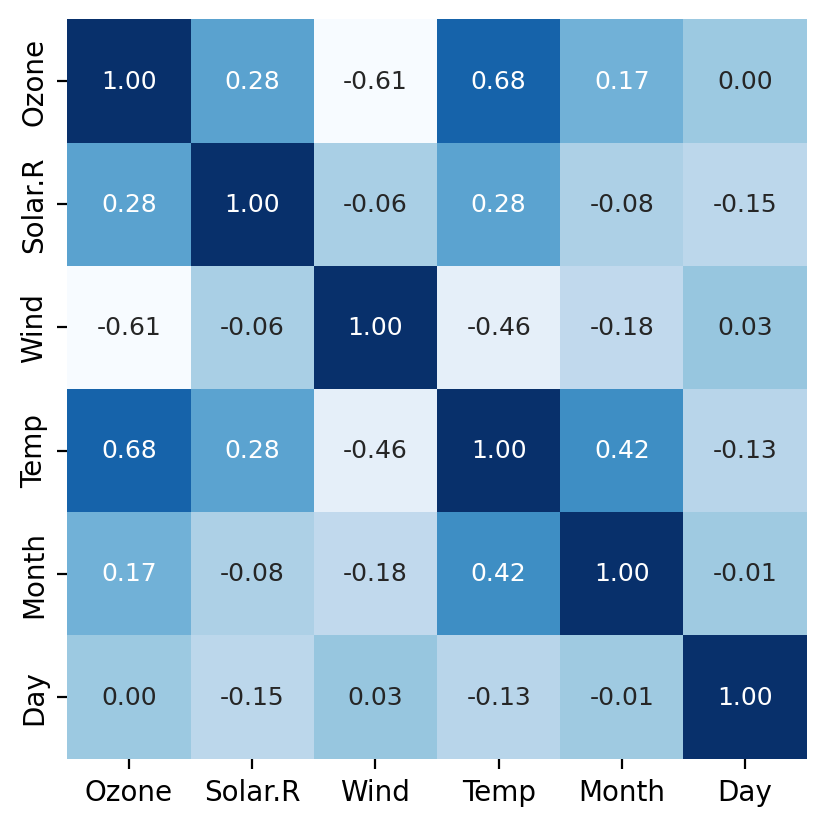

In [88]:
# 상관관계 시각화
sns.heatmap(data.corr(numeric_only=True),
           annot=True,
           cmap='Blues',
           cbar=False,
           square=True,
           fmt='.2f',
           annot_kws={'size':9})

# square: 정사각형 모양으로
# fmt: 반올림해서 소수 2번째자리까지 표시
# annot_kws 'size': 글씨 크기 지정 (kws: keyword arguments)

plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [89]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [90]:
# 전날 값으로 결측치 채우기
data.fillna(method = 'ffill', inplace=True)
# 결측치 있는 행이 Solar.R 뿐이므로 굳이 열이름 언급해줄 필요 X

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

결측치라고 무조건 버려야 하는 게 아님 <br>
Ex) 설문조사 때 결측치 있을 경우 -> 설문에 응하지 않은 것
(회사에 불만이 있다는 것.. 설문조차 안해주겠다)
=> 이런 경우 무작정 결측치 버리면 안됨. 99나 -1로 바꿔서 그것에 대한 분석도 필요

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [91]:
# 변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [92]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]
# y = data[target] # 처럼 써줘도 ㄱㅊ

**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [93]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # test_size 대신 train_size=0.7로 줘도 되긴 함
# train_test_split은 데이터를 셔플해서 나누므로 → random_state 옵션 지정 필요
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [94]:
print(x_train.shape)
print(y_train.shape)

(107, 3)
(107,)


ㄴ튜플은 요소가 하나여도 콤마 붙여야 함

In [95]:
# 학습 데이터 확인
x_train.head()

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,313.0,14.3,56


In [96]:
y_train.head()

132    24
73     27
18     30
48     20
4      19
Name: Ozone, dtype: int64

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요? → 회귀
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [97]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error # 평가지표는 metrics에 전부 다 있음

In [98]:
# 2단계: 선언하기
model = LinearRegression()

In [99]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [100]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [101]:
# 5단계: 평가하기
print('MAE:', mean_absolute_error(y_test, y_pred)) # 정답 먼저, 예측값은 뒤에 써 줘야 함! *순서*

MAE: 13.976843190385708


평균 13.98정도 차이난다는 의미 → 오차 → 적을수록 좋음<br><br>
<MAE 계산 법><br>
1. 각 예측 값과 실제 값 사이의 차이를 계산합니다.<br>
2. 이 차이의 절대값을 취합니다.<br>
3. 이러한 절대값의 평균을 계산합니다.<br><br>
=> 성능 높이기 위해 데이터를 다르게 전처리해본다든가, 다른 알고리즘을 사용해본다든가, 새로 알고리즘을 만들어보자

In [102]:
# 실제값
y_test.values[:10] # 시리즈이므로 values

array([24, 18, 97, 47, 34, 22, 66, 18, 69, 27], dtype=int64)

In [104]:
# 예측값
y_pred[:10] # 배열이므로 그냥

array([13.84003067,  5.82919112, 81.93563027, 58.41267418, 50.86150737,
       31.52971121, 66.8083547 , -8.56411529, 50.2136544 , 39.13346172])

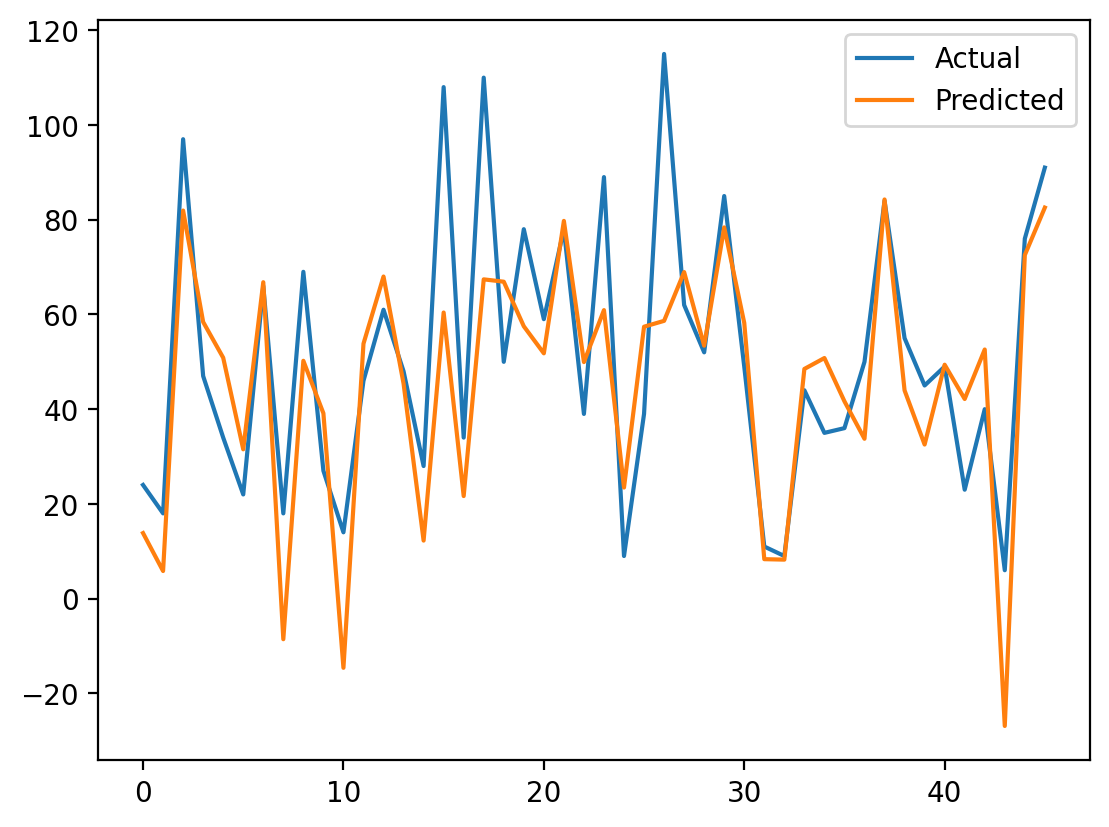

In [113]:
# 시각화
plt.plot(y_test.values, label='Actual') # 실제값
plt.plot(y_pred, label='Predicted') # 예측값
plt.legend()
plt.show()